In [1]:
# conda install pandas
# pip install scipy
# pip install statsmodels
# pip install -U scikit-learn
# pip install seaborn
# pip install matplotlib
# import numpy

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# create .

In [4]:
df = pd.read_csv("autos_dataset.csv")
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


# Exploratory data analysis 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
# 1.symboling 
df['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [8]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [9]:
# 2. normalized_losses
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [10]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [11]:
df['normalized-losses'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: normalized-losses
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [12]:
df.replace({'?':np.nan},inplace=True)

In [13]:
df['normalized-losses'].value_counts()

161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: normalized-losses, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [15]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [16]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [17]:
df['normalized-losses'] = df['normalized-losses'].astype(float)

In [18]:
df['normalized-losses'].isna().sum()

41

In [19]:
df.isna().mean()*100

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [21]:
df['normalized-losses'].mean()

122.0

In [22]:
df['normalized-losses'].median()

115.0

In [23]:
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace=True)

In [24]:
df['normalized-losses'].isna().sum()

0

In [25]:
df['normalized-losses'] = df['normalized-losses'].astype(int)

In [26]:
df['normalized-losses'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: normalized-losses
Non-Null Count  Dtype
--------------  -----
205 non-null    int32
dtypes: int32(1)
memory usage: 948.0 bytes


In [27]:
# 3.make
df['make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [28]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [29]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [30]:
df['make'].isna().sum()

0

In [31]:
# 4.fuel_type 
df['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 205, dtype: object

In [32]:
df['fuel-type'].isna().sum()

0

In [33]:
df['fuel-type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: fuel-type
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [34]:
df['fuel-type'].nunique()

2

In [35]:
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [36]:
df['fuel-type'].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

In [37]:
fuel_type_value = {'gas': 1, 'diesel': 0}

In [38]:
df['fuel-type'].replace({'gas': 1, 'diesel': 0},inplace=True)

In [39]:
df['fuel-type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: fuel-type
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [40]:
# aspiration 
df['aspiration']

0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

In [41]:
df['aspiration'].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [42]:
aspiration_value = {'std':0, 'turbo':1}

In [43]:
df['aspiration'].replace({'std':0, 'turbo':1},inplace = True)

In [44]:
df['aspiration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: aspiration
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [45]:
# 6.num-of-doors 
df['num-of-doors']

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [46]:
df['num-of-doors'].value_counts().to_dict()

{'four': 114, 'two': 89}

In [47]:
df['num-of-doors'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: num-of-doors
Non-Null Count  Dtype 
--------------  ----- 
203 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [48]:
num_of_doors_value = {'four':4,'two':2}

In [49]:
df['num-of-doors'].replace({'four': 4, 'two':2},inplace = True)

In [50]:
df['num-of-doors'].isna().sum()

2

In [51]:
df['num-of-doors'].mode()[0]

4.0

In [52]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0],inplace = True)

In [53]:
df['num-of-doors'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: num-of-doors
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [54]:
# missing value , datatype of columns , categorical or numerical 

In [55]:
# 7. body-style
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [56]:
df['body-style'].isna().sum()

0

In [57]:
df['body-style'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: body-style
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [58]:
df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [59]:
df = pd.get_dummies(df,columns=['body-style'])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,115,alfa-romero,1,0,2.0,rwd,front,88.6,168.8,...,111,5000,21,27,13495,1,0,0,0,0
1,3,115,alfa-romero,1,0,2.0,rwd,front,88.6,168.8,...,111,5000,21,27,16500,1,0,0,0,0
2,1,115,alfa-romero,1,0,2.0,rwd,front,94.5,171.2,...,154,5000,19,26,16500,0,0,1,0,0
3,2,164,audi,1,0,4.0,fwd,front,99.8,176.6,...,102,5500,24,30,13950,0,0,0,1,0
4,2,164,audi,1,0,4.0,4wd,front,99.4,176.6,...,115,5500,18,22,17450,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,0,4.0,rwd,front,109.1,188.8,...,114,5400,23,28,16845,0,0,0,1,0
201,-1,95,volvo,1,1,4.0,rwd,front,109.1,188.8,...,160,5300,19,25,19045,0,0,0,1,0
202,-1,95,volvo,1,0,4.0,rwd,front,109.1,188.8,...,134,5500,18,23,21485,0,0,0,1,0
203,-1,95,volvo,0,1,4.0,rwd,front,109.1,188.8,...,106,4800,26,27,22470,0,0,0,1,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    object 
 7   engine-location         205 non-null    object 
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

In [61]:
# 8.drive-wheels
df['drive-wheels']

0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
200    rwd
201    rwd
202    rwd
203    rwd
204    rwd
Name: drive-wheels, Length: 205, dtype: object

In [62]:
df['drive-wheels'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: drive-wheels
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [63]:
df['drive-wheels'].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [64]:
drive_wheels_value = {'fwd': 0, 'rwd': 1, '4wd': 2}

In [65]:
df['drive-wheels'].replace({'fwd': 0, 'rwd': 1, '4wd': 2},inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    object 
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  engine-type             205 non-null    object 
 14  num-of-cylinders        205 non-null    ob

In [67]:
# 9.engine-location
df['engine-location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: engine-location
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [68]:
df['engine-location'].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [69]:
engine_location_value = {'front':1, 'rear':0}

In [70]:
df['engine-location'].replace({'front':1, 'rear':0},inplace=True)

In [71]:
df['engine-location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: engine-location
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [72]:
df['wheel-base'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: wheel-base
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [73]:
df['wheel-base'].isna().sum()

0

In [74]:
# 10 . length  
df['length'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: length
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [75]:
# 11. width
df['width'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: width
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [76]:
# 12. height
df['height'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: height
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [77]:
# 13. curb-weight
df['curb-weight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: curb-weight
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [78]:
# 14. engine-type 
df['engine-type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: engine-type
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [79]:
df['engine-type'].value_counts().to_dict()

{'ohc': 148,
 'ohcf': 15,
 'ohcv': 13,
 'dohc': 12,
 'l': 12,
 'rotor': 4,
 'dohcv': 1}

In [80]:
df = pd.get_dummies(df,columns = ['engine-type'])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,115,alfa-romero,1,0,2.0,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
1,3,115,alfa-romero,1,0,2.0,1,1,88.6,168.8,...,0,0,0,1,0,0,0,0,0,0
2,1,115,alfa-romero,1,0,2.0,1,1,94.5,171.2,...,1,0,0,0,0,0,0,0,1,0
3,2,164,audi,1,0,4.0,0,1,99.8,176.6,...,0,1,0,0,0,0,1,0,0,0
4,2,164,audi,1,0,4.0,2,1,99.4,176.6,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,0,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
201,-1,95,volvo,1,1,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
202,-1,95,volvo,1,0,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,0,0,1,0
203,-1,95,volvo,0,1,4.0,1,1,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    object 
 14  engine-size             205 non-null    in

In [82]:
# 15. num-of-cylinders 
df['num-of-cylinders'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: num-of-cylinders
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [83]:
df['num-of-cylinders'].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [84]:
num_of_cylinders_value = {'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12}

In [85]:
df['num-of-cylinders'].replace({'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12},inplace=True)

In [86]:
df['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: num-of-cylinders, dtype: int64

In [87]:
df['num-of-cylinders'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: num-of-cylinders
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [88]:
# 16.engine-size
df['engine-size'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: engine-size
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [89]:
df.isna().sum()

symboling                 0
normalized-losses         0
make                      0
fuel-type                 0
aspiration                0
num-of-doors              0
drive-wheels              0
engine-location           0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
num-of-cylinders          0
engine-size               0
fuel-system               0
bore                      4
stroke                    4
compression-ratio         0
horsepower                2
peak-rpm                  2
city-mpg                  0
highway-mpg               0
price                     4
body-style_convertible    0
body-style_hardtop        0
body-style_hatchback      0
body-style_sedan          0
body-style_wagon          0
engine-type_dohc          0
engine-type_dohcv         0
engine-type_l             0
engine-type_ohc           0
engine-type_ohcf          0
engine-type_ohcv          0
engine-type_rotor   

In [90]:
# 17.fuel-system 
df['fuel-system'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: fuel-system
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [91]:
df['fuel-system'].isna().sum()

0

In [92]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [93]:
df=pd.get_dummies(df,columns=['fuel-system'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

In [94]:
# 18 . bore
df['bore'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: bore
Non-Null Count  Dtype 
--------------  ----- 
201 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [95]:
df['bore'] = df['bore'].fillna(df['bore'].median()).astype(float)


In [96]:
df['bore'].isna().sum()

0

In [97]:
df.isna().sum()

symboling                 0
normalized-losses         0
make                      0
fuel-type                 0
aspiration                0
num-of-doors              0
drive-wheels              0
engine-location           0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
num-of-cylinders          0
engine-size               0
bore                      0
stroke                    4
compression-ratio         0
horsepower                2
peak-rpm                  2
city-mpg                  0
highway-mpg               0
price                     4
body-style_convertible    0
body-style_hardtop        0
body-style_hatchback      0
body-style_sedan          0
body-style_wagon          0
engine-type_dohc          0
engine-type_dohcv         0
engine-type_l             0
engine-type_ohc           0
engine-type_ohcf          0
engine-type_ohcv          0
engine-type_rotor         0
fuel-system_1bbl    

In [98]:
df['bore'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: bore
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [99]:
# 19.stroke
df['stroke'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: stroke
Non-Null Count  Dtype 
--------------  ----- 
201 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [100]:
df['stroke'] = df['stroke'].fillna(df['stroke'].median()).astype(float)

In [101]:
df['stroke'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: stroke
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [102]:
# 20.compression-ratio  
df['compression-ratio'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: compression-ratio
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [103]:
df['compression-ratio'].isna().sum()

0

In [104]:
# 21. horsepower  
df['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: horsepower
Non-Null Count  Dtype 
--------------  ----- 
203 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [105]:
df['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: horsepower
Non-Null Count  Dtype 
--------------  ----- 
203 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [106]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median()).astype(float)

In [107]:
df['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   make                    205 non-null    object 
 3   fuel-type               205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   num-of-doors            205 non-null    float64
 6   drive-wheels            205 non-null    int64  
 7   engine-location         205 non-null    int64  
 8   wheel-base              205 non-null    float64
 9   length                  205 non-null    float64
 10  width                   205 non-null    float64
 11  height                  205 non-null    float64
 12  curb-weight             205 non-null    int64  
 13  num-of-cylinders        205 non-null    int64  
 14  engine-size             205 non-null    in

In [109]:
# 22.peak-rpm 
df['peak-rpm'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: peak-rpm
Non-Null Count  Dtype 
--------------  ----- 
203 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [110]:
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].median()).astype(int)

In [111]:
df['peak-rpm'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: peak-rpm
Non-Null Count  Dtype
--------------  -----
205 non-null    int32
dtypes: int32(1)
memory usage: 948.0 bytes


In [112]:
# 23.city-mpg  
df['city-mpg'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: city-mpg
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [113]:
df['city-mpg'].value_counts()

31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: city-mpg, dtype: int64

In [114]:
# 24. highway-mpg 
df['highway-mpg'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: highway-mpg
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [115]:
# 25.price
df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
201 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [116]:
df['price']=df['price'].fillna(df['price'].median()).astype(int)

In [117]:
df = pd.get_dummies(df,columns=['make'])
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,115,1,0,2.0,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,115,1,0,2.0,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,115,1,0,2.0,1,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,164,1,0,4.0,0,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,164,1,0,4.0,2,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,1,0,4.0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,0,0,0,0,1
201,-1,95,1,1,4.0,1,1,109.1,188.8,68.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95,1,0,4.0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,0,0,0,0,1
203,-1,95,0,1,4.0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,0,0,0,0,1


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    float64
 5   drive-wheels            205 non-null    int64  
 6   engine-location         205 non-null    int64  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int64  
 13  engine-size             205 non-null    int64  
 14  bore                    205 non-null    fl

In [119]:
# feature engineering

In [120]:
# feature selection 

In [121]:
df.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
symboling,1.000000,0.457484,0.194311,-0.059866,-0.663595,-0.111150,-0.212471,-0.531954,-0.357612,-0.232919,...,0.041422,-0.159891,0.025103,0.224755,0.013252,0.232847,-0.067071,-0.094046,0.167106,-0.403849
normalized-losses,0.457484,1.000000,0.104668,-0.011273,-0.348850,0.133824,0.021510,-0.073709,-0.006837,0.058378,...,0.142443,0.177668,0.037928,0.042858,-0.017519,0.035026,-0.222808,-0.137758,-0.011265,-0.218742
fuel-type,0.194311,0.104668,1.000000,-0.401397,-0.188496,-0.051874,-0.040070,-0.308346,-0.212679,-0.233880,...,0.043921,-0.286482,0.061822,0.051988,0.032636,0.057092,0.081986,0.005524,-0.198133,0.005338
aspiration,-0.059866,-0.011273,-0.401397,1.000000,0.052803,0.153897,0.057191,0.257611,0.234539,0.300567,...,-0.100783,0.225968,0.051445,-0.074202,-0.046581,0.069008,-0.008961,-0.166890,-0.008961,0.169682
num-of-doors,-0.663595,-0.348850,-0.188496,0.052803,1.000000,-0.003230,0.139129,0.439635,0.385675,0.197735,...,-0.041222,0.208575,0.002115,-0.180511,-0.013188,-0.023071,0.092641,-0.002910,0.050718,0.208575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
make_saab,0.232847,0.035026,0.057092,0.069008,-0.023071,-0.137340,0.021161,0.009927,0.177076,0.048052,...,-0.053872,-0.041347,-0.032649,-0.027455,-0.017235,1.000000,-0.043297,-0.074679,-0.043297,-0.041347
make_subaru,-0.067071,-0.222808,0.081986,-0.008961,0.092641,0.161207,0.030388,-0.107161,-0.105172,-0.111605,...,-0.077362,-0.059376,-0.046884,-0.039426,-0.024750,-0.043297,1.000000,-0.107242,-0.062176,-0.059376
make_toyota,-0.094046,-0.137758,0.005524,-0.166890,-0.002910,0.077127,0.052413,-0.046785,-0.073906,-0.164234,...,-0.133434,-0.102411,-0.080866,-0.068002,-0.042689,-0.074679,-0.107242,1.000000,-0.107242,-0.102411
make_volkswagen,0.167106,-0.011265,-0.198133,-0.008961,0.050718,-0.197225,0.030388,-0.047664,-0.030714,-0.033924,...,-0.077362,-0.059376,-0.046884,-0.039426,-0.024750,-0.043297,-0.062176,-0.107242,1.000000,-0.059376


<AxesSubplot: >

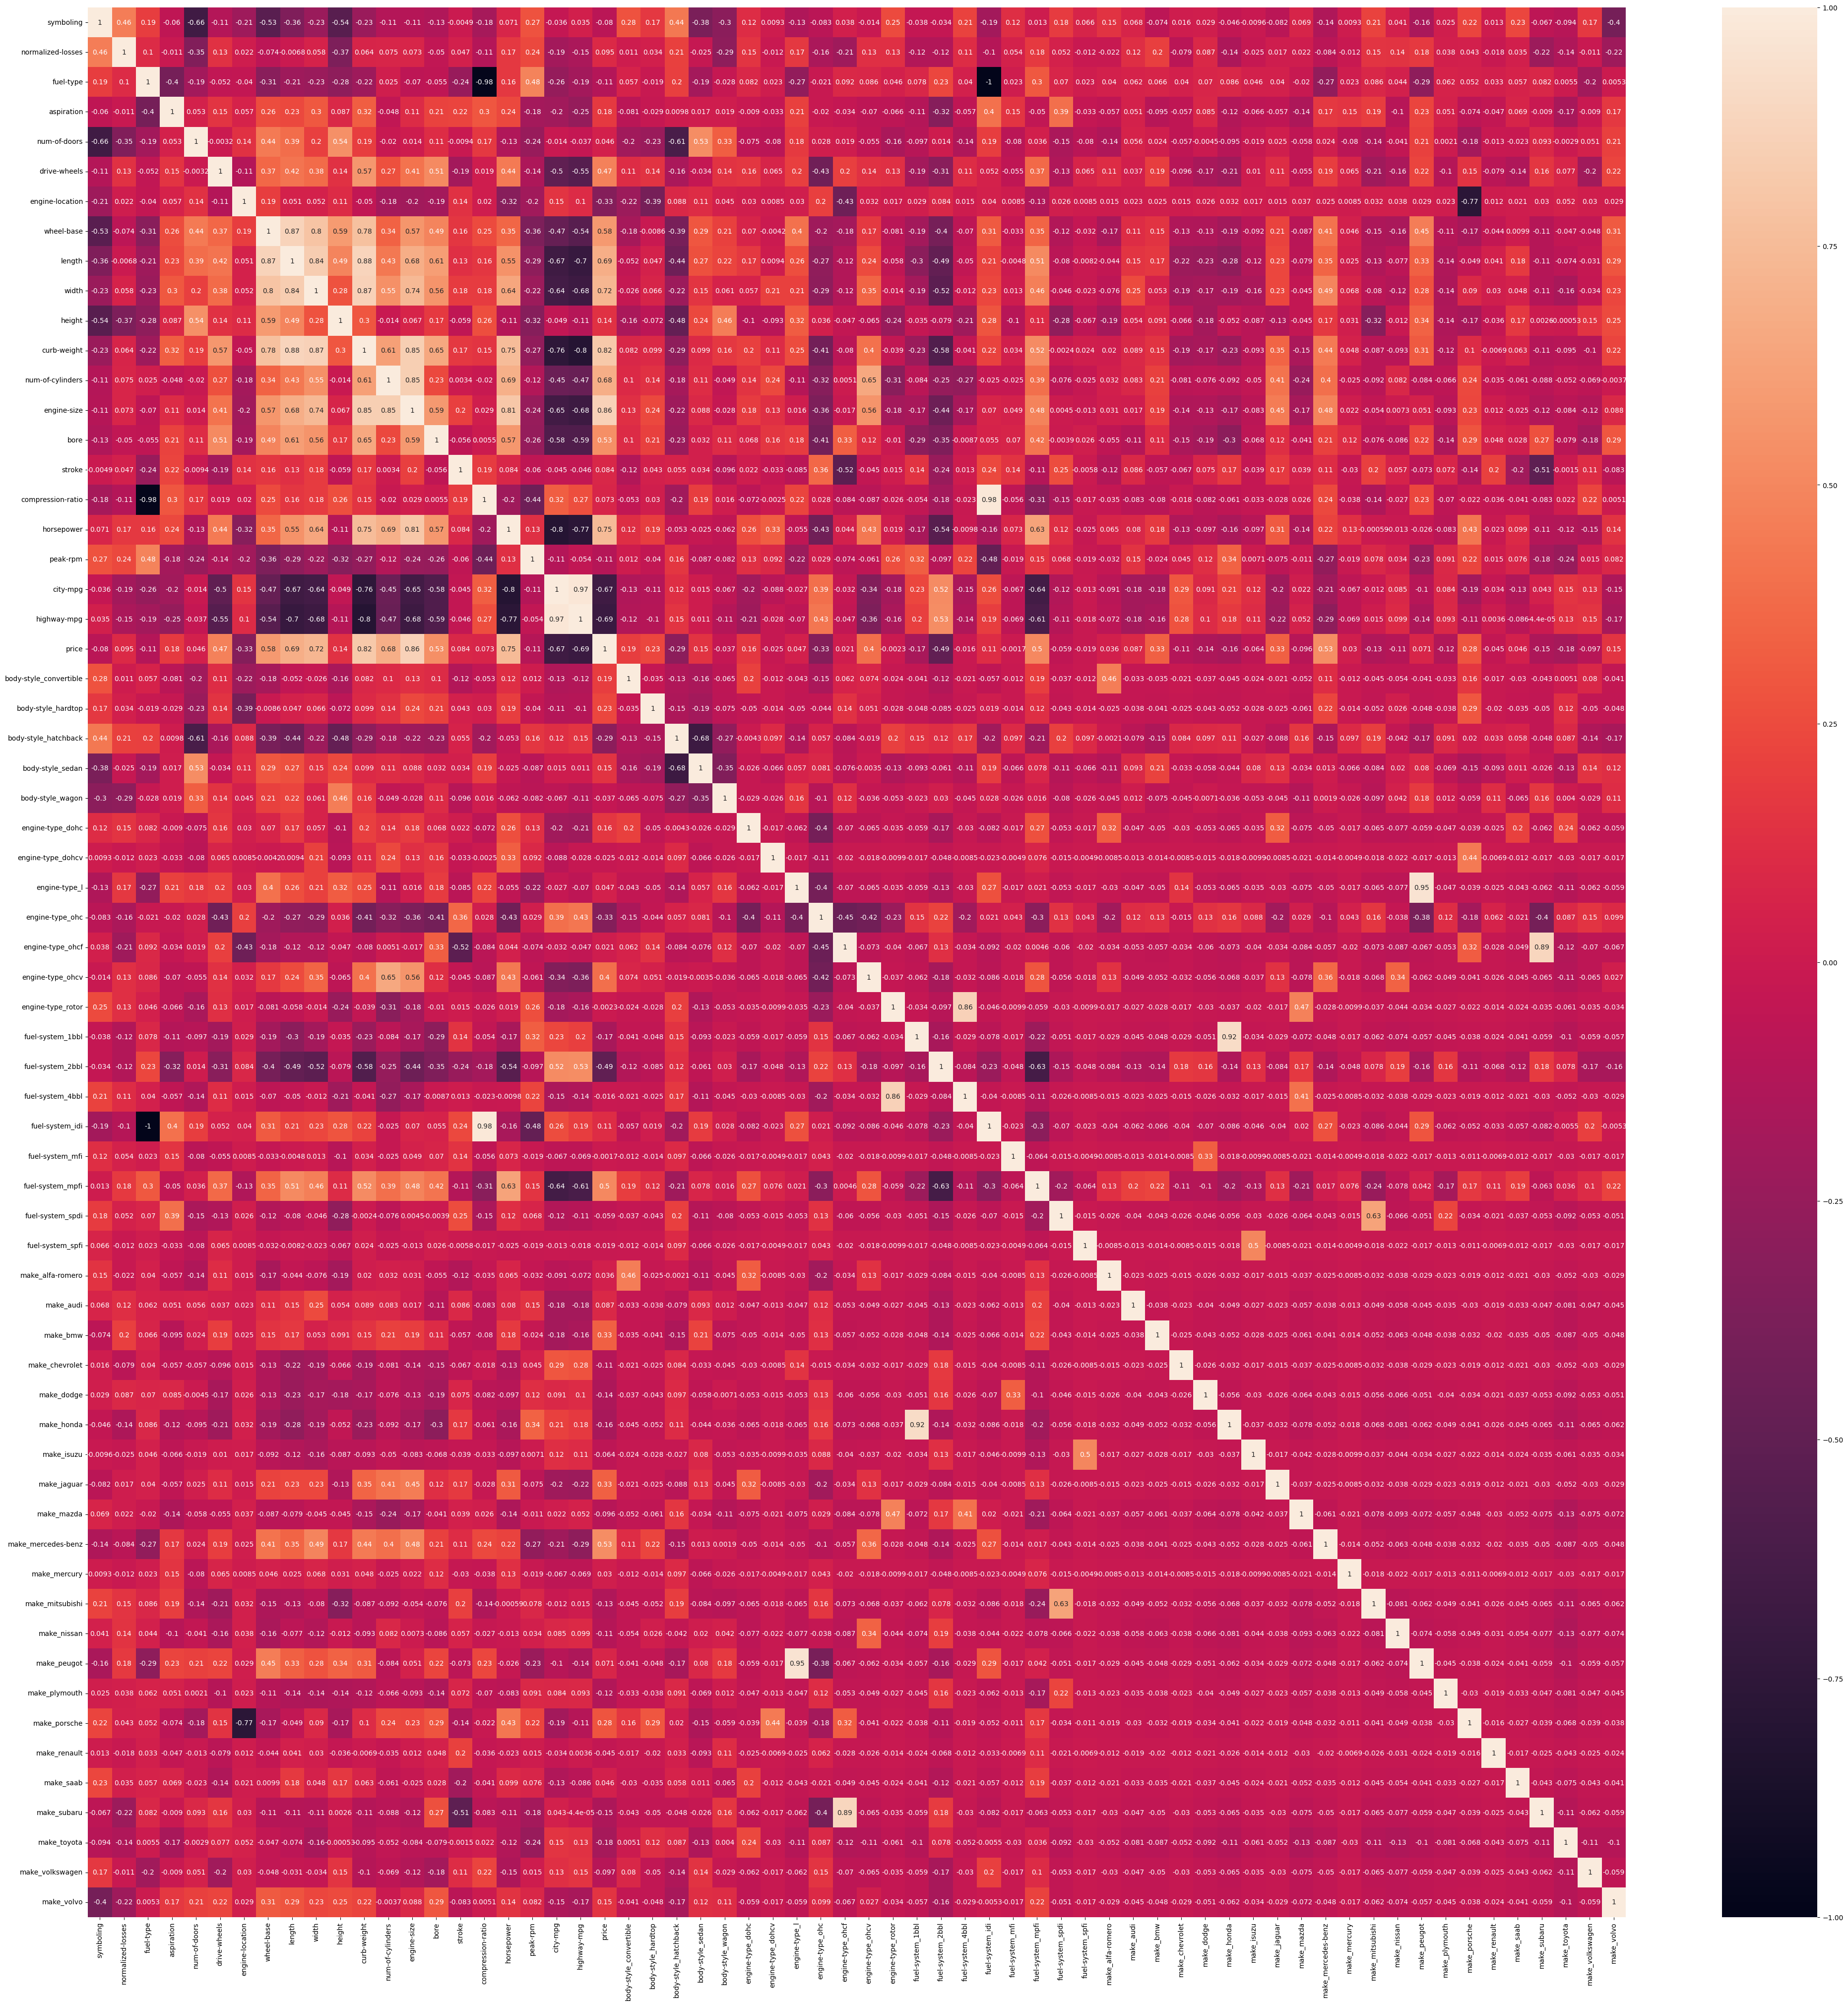

In [122]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)

In [123]:
# Train Test spilt

In [124]:
x = df.drop('price',axis=1)
y = df['price']

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [126]:
x_train.shape

(164, 63)

In [127]:
x_test.shape

(41, 63)

In [128]:
# model training 
# 1.creating instance of model 

In [129]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [130]:
# model evaluation 

In [131]:
y_pred = model.predict(x_test)
y_pred[:10]

array([ 5535.4294845 ,  5849.43954126, 16475.52281977, 32834.6140948 ,
        7914.89656502, 15578.53061975, 19162.64643349,  7585.75507313,
        6348.6742386 ,  8482.27303597])

In [132]:
y_test[:10]

154     7898
21      5572
198    18420
48     35550
34      7129
194    12940
6      17710
25      6692
159     7788
122     7609
Name: price, dtype: int32

In [133]:
# testing dataset 
mse = mean_squared_error(y_test,y_pred)
print('mse -->',mse)

rmse = np.sqrt(mse)
print('rmse -->',rmse)

mae = mean_absolute_error(y_test,y_pred)
print('mae -->',mae)

r2 = r2_score(y_test,y_pred)
print('r2 -->',r2)

mse --> 7477765.873380093
rmse --> 2734.5503969354986
mae --> 1792.733933569561
r2 --> 0.8905392554012712


In [134]:
# training dataset 
y_pred_train = model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print('mse -->',mse)

rmse = np.sqrt(mse)
print('rmse -->',rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print('mae -->',mae)

r2 = r2_score(y_train,y_pred_train)
print('r2 -->',r2)

adj_r2 = 1 - ((1 - r2) * (x_test.shape[0] - 1))/(x_test.shape[0] - x_test.shape[1] - 1)
adj_r2

mse --> 2638125.9489119393
rmse --> 1624.230879189267
mae --> 1130.1885358832544
r2 --> 0.9561001162367829


1.0763476239360297

In [135]:
# Testing on single row 

In [136]:
data = pd.read_csv('autos_dataset.csv')
data.head(1).T

,0
symboling,3
normalized-losses,?
make,alfa-romero
fuel-type,gas
aspiration,std
num-of-doors,two
body-style,convertible
drive-wheels,rwd
engine-location,front
wheel-base,88.6


In [137]:
print(fuel_type_value)
print(aspiration_value)
print(num_of_doors_value)
print(drive_wheels_value)
print(engine_location_value)
print(num_of_cylinders_value)

{'gas': 1, 'diesel': 0}
{'std': 0, 'turbo': 1}
{'four': 4, 'two': 2}
{'fwd': 0, 'rwd': 1, '4wd': 2}
{'front': 1, 'rear': 0}
{'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}


In [138]:
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,115,1,0,2.0,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,115,1,0,2.0,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,115,1,0,2.0,1,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,2,164,1,0,4.0,0,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,2,164,1,0,4.0,2,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,1,0,4.0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,0,0,0,0,1
201,-1,95,1,1,4.0,1,1,109.1,188.8,68.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95,1,0,4.0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,0,0,0,0,1
203,-1,95,0,1,4.0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,0,0,0,0,1


In [139]:
# value enter by user
symboling=3
normalized_losses=120.0
fuel_type='gas'
aspiration='std'
num_of_doors='two'
drive_wheels='rwd'
engine_location='front'
wheel_base=88.6
length=168.8
width=64.1
height=48.8
curb_weight=2548
num_of_cylinders='four'
engine_size=130
bore=3.47
stroke=2.68
compression_ratio=9.0
horsepower=111
peak_rpm=5000
city_mpg=21
highway_mpg=27

# one hot encoded columns 
make = 'audi'
body_style = 'sedan' 
engine_type = 'ohc'
fuel_system = 'mpfi'

In [140]:
# define column names 
make_col = 'make_'+ make
body_style_col = 'body-style_'+ body_style
engine_type_col = 'engine-type_'+ engine_type
fuel_system_col = 'fuel-system_'+  fuel_system
print(make_col)
print(body_style_col)
print(engine_type_col)
print(fuel_system_col)

make_audi
body-style_sedan
engine-type_ohc
fuel-system_mpfi


In [141]:
column_names = x.columns
len(column_names)

63

In [142]:
make_index = np.where(column_names == make_col)[0][0]
body_style_index = np.where(column_names == body_style_col)[0][0]
engine_type_index = np.where(column_names == engine_type_col)[0][0]
fuel_system_index = np.where(column_names == fuel_system_col)[0][0]

print(make_index)
print(body_style_index)
print(engine_type_index)
print(fuel_system_index)

42
24
29
38


In [143]:
array = np.zeros(len(column_names),dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [144]:
# value enter by user
array[0]=symboling
array[1]=normalized_losses
array[2]=fuel_type_value[fuel_type]
array[3]=aspiration_value[aspiration]
array[4]=num_of_doors_value[num_of_doors]
array[5]=drive_wheels_value[drive_wheels]
array[6]=engine_location_value[engine_location]
array[7]=wheel_base
array[8]=length
array[9]=width
array[10]=height
array[11]=curb_weight
array[12]=num_of_cylinders_value[num_of_cylinders]
array[13]=engine_size
array[14]=bore
array[15]=stroke
array[16]=compression_ratio
array[17]=horsepower
array[18]=peak_rpm
array[19]=city_mpg
array[20]=highway_mpg

# one hot encoded columns 
array[make_index] = 1
array[body_style_index] = 1 
array[engine_type_index] = 1
array[fuel_system_index] = 1

print(array)

[   3  120    1    0    2    1    1   88  168   64   48 2548    4  130
    3    2    9  111 5000   21   27    0    0    0    1    0    0    0
    0    1    0    0    0    0    0    0    0    0    1    0    0    0
    1    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


In [145]:
predicted_price = model.predict([array])
print('Predicted price of your car : ',predicted_price[0],'Rs.')

Predicted price of your car :  17359.46108355545 Rs.


In [146]:
list(column_names)

['symboling',
 'normalized-losses',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'body-style_convertible',
 'body-style_hardtop',
 'body-style_hatchback',
 'body-style_sedan',
 'body-style_wagon',
 'engine-type_dohc',
 'engine-type_dohcv',
 'engine-type_l',
 'engine-type_ohc',
 'engine-type_ohcf',
 'engine-type_ohcv',
 'engine-type_rotor',
 'fuel-system_1bbl',
 'fuel-system_2bbl',
 'fuel-system_4bbl',
 'fuel-system_idi',
 'fuel-system_mfi',
 'fuel-system_mpfi',
 'fuel-system_spdi',
 'fuel-system_spfi',
 'make_alfa-romero',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_jaguar',
 'make_mazda',
 'make_mercedes-benz',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 

In [147]:
# store all this values in json 
label_encoded_columns_dict = {'fuel_type_value':fuel_type_value,'aspiration':aspiration_value,
                             'num_of_doors_values':num_of_doors_value,'drive_wheels_value':drive_wheels_value,
                             'engine_location_value':engine_location_value,'num_of_cylinders_value':num_of_cylinders_value,
                             'column_names':list(column_names)}
label_encoded_columns_dict

{'fuel_type_value': {'gas': 1, 'diesel': 0},
 'aspiration': {'std': 0, 'turbo': 1},
 'num_of_doors_values': {'four': 4, 'two': 2},
 'drive_wheels_value': {'fwd': 0, 'rwd': 1, '4wd': 2},
 'engine_location_value': {'front': 1, 'rear': 0},
 'num_of_cylinders_value': {'four': 4,
  'six': 6,
  'five': 5,
  'eight': 8,
  'two': 2,
  'three': 3,
  'twelve': 12},
 'column_names': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'body-style_convertible',
  'body-style_hardtop',
  'body-style_hatchback',
  'body-style_sedan',
  'body-style_wagon',
  'engine-type_dohc',
  'engine-type_dohcv',
  'engine-type_l',
  'engine-type_ohc',
  'engine-type_ohcf',
  'engine-type_ohcv',
  'engine-type_rotor',
  'fuel-syste

In [148]:
import json 
with open('json_data.json','w') as f:
    json.dump(label_encoded_columns_dict,f)

In [149]:
model

LinearRegression()

In [150]:
import pickle 
with open('linear_model.pkl','wb') as f:
    pickle.dump(model,f)

<AxesSubplot: >

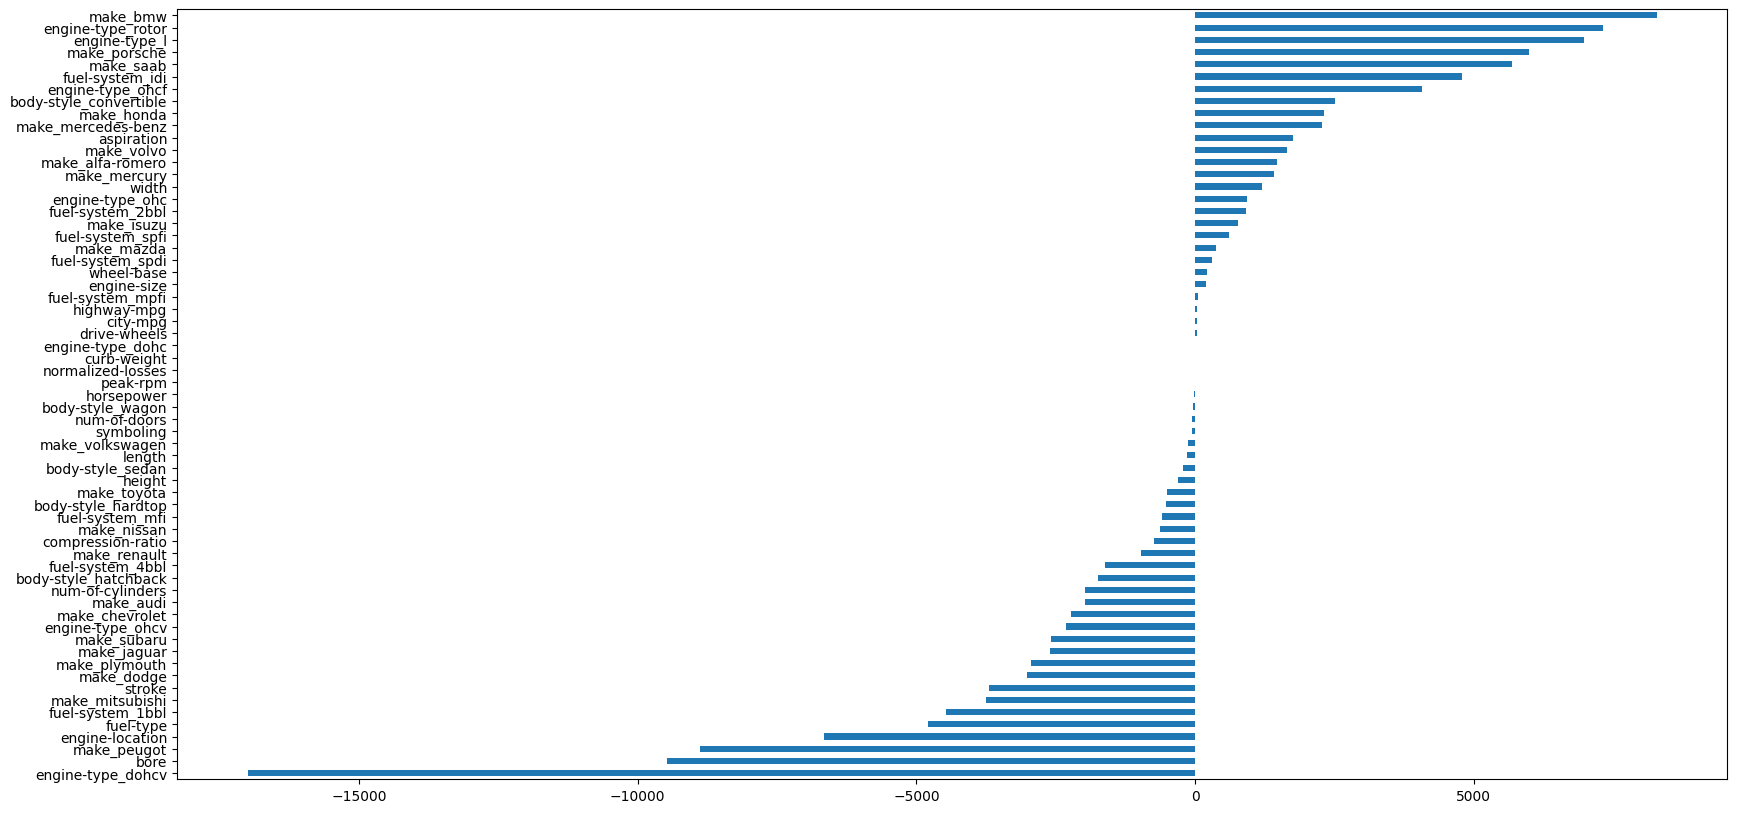

In [151]:
s2 = pd.Series(model.coef_, index=x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind = "barh")

# Ridge regression  

In [152]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.5)

In [153]:
# Training data set :- 

y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print('mse : ',mse)
rmse = np.sqrt(mse)
print('rmse :',rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print('mae :',mae)
r2 = r2_score(y_train,y_pred_train)
print('r-squared : ',r2)

mse :  3135339.585931428
rmse : 1770.6890144605934
mae : 1256.8385358092642
r-squared :  0.947826204644486


In [154]:
# Testing data set :- 

y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print('mse : ',mse)
rmse = np.sqrt(mse)
print('rmse :',rmse)
mae = mean_absolute_error(y_test,y_pred)
print('mae :',mae)
r2 = r2_score(y_test,y_pred)
print('r-squared : ',r2)

mse :  4920001.888954412
rmse : 2218.1077270850515
mae : 1458.1155922650291
r-squared :  0.9279802177132528


<AxesSubplot: >

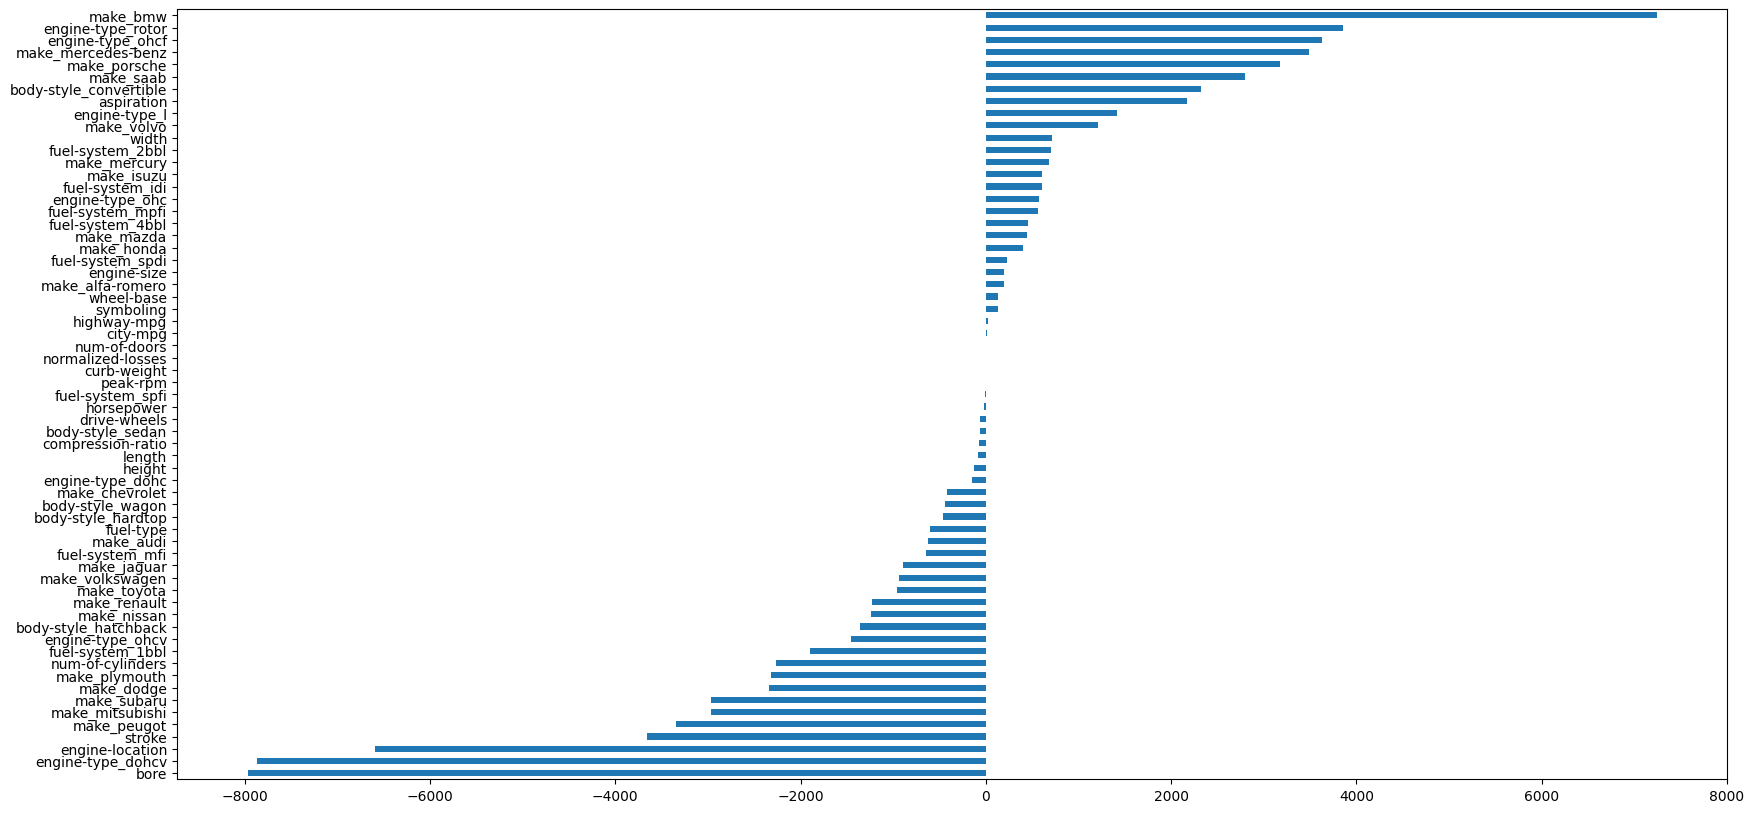

In [155]:
ridge_model = Ridge(alpha = 0.5)
ridge_model.fit(x_train,y_train)

s2 = pd.Series(ridge_model.coef_,index = x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind='barh')

# Lasso regression 

In [156]:
lasso_model = Lasso(alpha = 1.0)
lasso_model.fit(x_train,y_train)

Lasso()

In [157]:
# Training dataset

y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print('mse : ',mse)
rmse = np.sqrt(mse)
print('rmse :',rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print('mae :',mae)
r2 = r2_score(y_train,y_pred_train)
print('r-squared : ',r2)

mse :  2650180.8480500886
rmse : 1627.9376056993365
mae : 1136.443315474665
r-squared :  0.9558995160072298


In [158]:
# Testing data set :- 

y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print('mse : ',mse)
rmse = np.sqrt(mse)
print('rmse :',rmse)
mae = mean_absolute_error(y_test,y_pred)
print('mae :',mae)
r2 = r2_score(y_test,y_pred)
print('r-squared : ',r2)

mse :  7183190.2157118665
rmse : 2680.147424249619
mae : 1736.313317951614
r-squared :  0.8948513014555359


<AxesSubplot: >

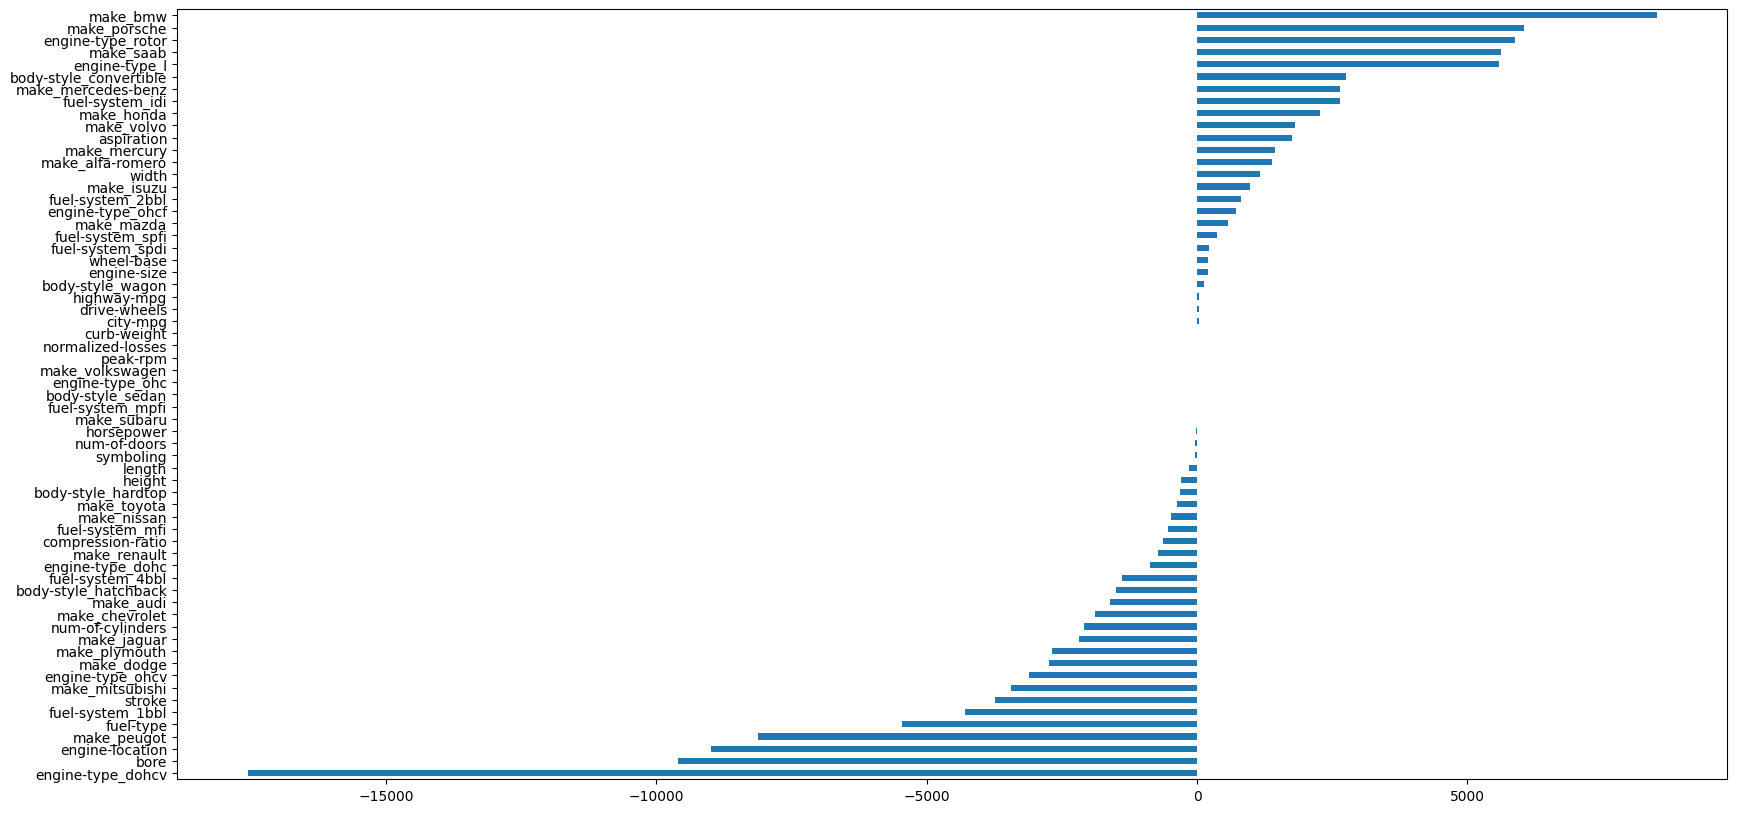

In [159]:
lasso_model = Lasso(alpha = 0.5)
lasso_model.fit(x_train,y_train)

s2 = pd.Series(lasso_model.coef_,index = x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind='barh')

# Hyperparameter Tunning 

# Ridge regression with hyperparameter tunning 

# 1. GridSerchCV 

In [160]:
ridge_model = Ridge()
param_grid = {'alpha':np.arange(0.01,3,0.01)}
gscv_ridge_model = GridSearchCV(ridge_model,param_grid)
gscv_ridge_model.fit(x_train,y_train)
gscv_ridge_model.best_estimator_

Ridge(alpha=0.16)

In [161]:
# Training data set :- 
ridge_model = Ridge(alpha = 0.16)
ridge_model.fit(x_train,y_train)
y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print('mse : ',mse)
rmse = np.sqrt(mse)
print('rmse :',rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print('mae :',mae)
r2 = r2_score(y_train,y_pred_train)
print('r-squared : ',r2)

mse :  2768767.9348624568
rmse : 1663.9615184439983
mae : 1172.7282005851293
r-squared :  0.9539261608954207


In [162]:
# Testing data set :- 
y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print('mse : ',mse)
rmse = np.sqrt(mse)
print('rmse :',rmse)
mae = mean_absolute_error(y_test,y_pred)
print('mae :',mae)
r2 = r2_score(y_test,y_pred)
print('r-squared : ',r2)

mse :  6487079.437819925
rmse : 2546.9745656012988
mae : 1612.6663658737773
r-squared :  0.9050410834521218


# 2. RandomizedsearchCV 

In [163]:
ridge_model = Ridge()
param_grid = {'alpha':np.arange(0.01,3,0.01)}
rscv_ridge_model = RandomizedSearchCV(ridge_model,param_grid)
rscv_ridge_model.fit(x_train,y_train)
rscv_ridge_model.best_estimator_

Ridge(alpha=0.24000000000000002)

In [164]:
# Training data set :- 
ridge_model = Ridge(alpha = 0.27)
ridge_model.fit(x_train,y_train)
y_pred_train = ridge_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print('mse : ',mse)
rmse = np.sqrt(mse)
print('rmse :',rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print('mae :',mae)
r2 = r2_score(y_train,y_pred_train)
print('r-squared : ',r2)

mse :  2886656.4262272557
rmse : 1699.0163113482035
mae : 1203.470726472685
r-squared :  0.9519644308005895


In [165]:
# Testing data set :- 
y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print('mse : ',mse)
rmse = np.sqrt(mse)
print('rmse :',rmse)
mae = mean_absolute_error(y_test,y_pred)
print('mae :',mae)
r2 = r2_score(y_test,y_pred)
print('r-squared : ',r2)

mse :  5827215.760562993
rmse : 2413.9626675992718
mae : 1543.241554827693
r-squared :  0.9147002745352935


# Lasso Regression with hyperparameter tunning 

# 1.GridSearchCV

In [166]:
lasso_model = Lasso()
param_grid = {'alpha':np.arange(0.01,3,0.01)}
gscv_lasso_model = GridSearchCV(lasso_model,param_grid)
gscv_lasso_model.fit(x_train,y_train)
gscv_lasso_model.best_estimator_

Lasso(alpha=2.9899999999999998)

In [167]:
# Training data set :- 
lasso_model = Lasso(alpha = 2.99)
lasso_model.fit(x_train,y_train)
y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print('mse : ',mse)
rmse = np.sqrt(mse)
print('rmse :',rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print('mae :',mae)
r2 = r2_score(y_train,y_pred_train)
print('r-squared : ',r2)

mse :  2741679.418567308
rmse : 1655.801744946329
mae : 1165.390182429394
r-squared :  0.954376928879855


In [168]:
# Testing data set :- 
y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print('mse : ',mse)
rmse = np.sqrt(mse)
print('rmse :',rmse)
mae = mean_absolute_error(y_test,y_pred)
print('mae :',mae)
r2 = r2_score(y_test,y_pred)
print('r-squared : ',r2)

mse :  6886174.153882486
rmse : 2624.15208284171
mae : 1644.6449124830926
r-squared :  0.8991990705400646


# 2. RandomizedSearchCV 

In [169]:
lasso_model = Lasso()
param_grid = {'alpha':np.arange(0.01,3,0.01)}
rscv_lasso_model = RandomizedSearchCV(lasso_model,param_grid)
rscv_lasso_model.fit(x_train,y_train)
rscv_lasso_model.best_estimator_

Lasso(alpha=2.82)

In [170]:
# Training data set :- 
lasso_model = Lasso(alpha = 2.51)
lasso_model.fit(x_train,y_train)
y_pred_train = lasso_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print('mse : ',mse)
rmse = np.sqrt(mse)
print('rmse :',rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print('mae :',mae)
r2 = r2_score(y_train,y_pred_train)
print('r-squared : ',r2)

mse :  2712563.884593103
rmse : 1646.9863037053778
mae : 1155.446243861871
r-squared :  0.9548614275663938


In [171]:
# Testing data set :- 
y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print('mse : ',mse)
rmse = np.sqrt(mse)
print('rmse :',rmse)
mae = mean_absolute_error(y_test,y_pred)
print('mae :',mae)
r2 = r2_score(y_test,y_pred)
print('r-squared : ',r2)

mse :  6941976.479495842
rmse : 2634.7630784371945
mae : 1658.132551581525
r-squared :  0.8983822270850265


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    int32  
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    float64
 5   drive-wheels            205 non-null    int64  
 6   engine-location         205 non-null    int64  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int64  
 13  engine-size             205 non-null    int64  
 14  bore                    205 non-null    fl

In [173]:
with open ('json_Data.json','r') as f:
    json_Data = json.load(f)
load

NameError: name 'load' is not defined

In [174]:
json_Data['fuel_type_value'][fuel_type]

1

In [175]:
class CarPrice():
    def __init__(self,symboling,normalized_losses,fuel_type,aspiration,num_of_doors,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,make,body_style,engine_type,fuel_system):
        self.symboling = symboling
        self.normalized_losses = normalized_losses
        self.fuel_type	= fuel_type
        self.aspiration	=  aspiration
        self.num_of_doors  = num_of_doors
        self.drive_wheels	= drive_wheels
        self.engine_location	= engine_location
        self.wheel_base	= wheel_base
        self.length	= length
        self.width	= width
        self.height = height
        self.curb_weight	 = curb_weight
        self.num_of_cylinders = num_of_cylinders
        self.engine_size = engine_size
        self.bore	= bore
        self.stroke	= stroke
        self.compression_ratio	= compression_ratio
        self.horsepower	= horsepower
        self.peak_rpm	= peak_rpm
        self.city_mpg	= city_mpg
        self.highway_mpg	= highway_mpg

        self.make =   "make_"+ make
        self.body_style	  ='body-style_'+ body_style
        self.engine_type	= 'engine-type_'+ engine_type
        self.fuel_system	= 'fuel-system_'+  fuel_system

    def load_model(self):
        with open('json_data.json','r') as f:
            self.json_data = json.load(f)


    def get_predicted_price(self):
        self.load_model()

        array = np.zeros(len(self.json_data['column_names']))

        array[0]=self.symboling
        array[1]=self.normalized_losses
        array[2]=self.json_data['fuel_type_value'][self.fuel_type]
        array[3]=self.json_data['aspiration'][self.aspiration]
        array[4]=self.json_data['num_of_doors_values'][self.num_of_doors]
        array[5]=self.json_data['drive_wheels_value'][self.drive_wheels]
        array[6]=self.json_data['engine_location_value'][self.engine_location]
        array[7]=self.wheel_base
        array[8]=self.length
        array[9]=self.width
        array[10]=self.height
        array[11]=self.curb_weight
        array[12]=self.json_data['num_of_cylinders_value'][self.num_of_cylinders]
        array[13]=self.engine_size
        array[14]=self.bore
        array[15]=self.stroke
        array[16]=self.compression_ratio
        array[17]=self.horsepower
        array[18]=self.peak_rpm
        array[19]=self.city_mpg
        array[20]=self.highway_mpg

        # one hot encoded columns 
        make_index = self.json_data['column_names'].index(self.make)
        body_style_index = self.json_data['column_names'].index(self.body_style)
        engine_type_index = self.json_data['column_names'].index(self.engine_type)
        fuel_system_index = self.json_data['column_names'].index(self.fuel_system)

        array[make_index] = 1
        array[body_style_index] = 1 
        array[engine_type_index] = 1
        array[fuel_system_index] = 1

        return 'success'

symboling=3
normalized_losses=120.0
fuel_type='gas'
aspiration='std'
num_of_doors='two'
drive_wheels='rwd'
engine_location='front'
wheel_base=88.6
length=168.8
width=64.1
height=48.8
curb_weight=2548
num_of_cylinders='four'
engine_size=130
bore=3.47
stroke=2.68
compression_ratio=9.0
horsepower=111
peak_rpm=5000
city_mpg=21
highway_mpg=27

    # one hot encoded columns 
make = 'audi'
body_style = 'sedan' 
engine_type = 'ohc'
fuel_system = 'mpfi'

car_price = CarPrice(symboling,normalized_losses,fuel_type,aspiration,num_of_doors,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,make,body_style,engine_type,fuel_system)
price = car_price.get_predicted_price()
print(f"Predicted car price is {price} RS. only")

Predicted car price is success RS. only
